In [1]:
# 합성곱신경망 = 데이터를 비슷한 친구끼리 묶어주는 것이 목적 (이미지에 적합)
# 뉴런 = 필터, 커널
# 패딩을 준다 = 외곽에 있는 데이터들이 학습에 골고루 사용될 수 있도록 주변에 여백을 줌

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
train_scaled = train_input.reshape(-1, 28,28, 1) / 255.0
# 뒤에 숫자 1을 넣은 것은 4차원을 만들겠다는 뜻
# 데이터가 변형되는 건 아니지만 종이한장짜리 데이터가 두께감(1)을 주었다고 생각하자

In [5]:
train_scaled, val_scaled, train_target, val_target = \
train_test_split(train_scaled, train_target)

In [6]:
model = keras.Sequential()
model.add(
    keras.layers.Conv2D(
        32, # 필터의 개수, 특성의 개수
        kernel_size=3, # 얼마만큼의 크기로 픽셀들을 묶을 것인지? 3x3으로 묶음처리 하겠다는 뜻
        activation='relu',
        padding='same', # 같은 사이즈의 패딩을 추가하겠당
        input_shape=(28, 28, 1)
    )
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.add(keras.layers.MaxPooling2D(2))
# 최대값을 pooling하겠다 - 각 픽셀에서 숫자가 가장 큰 픽셀이 가장 유의미하다
# 2 = 2X2 크기로 pooling 하고, 가장 큰 픽셀값을 뽑겠다

In [8]:
model.add(keras.layers.Conv2D(
    64,
    kernel_size=3,
    activation='relu',
    padding='same'
))

model.add(keras.layers.MaxPooling2D(2))

In [9]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4)) # 특성 껐다켰다
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

es = keras.callbacks.EarlyStopping(patience=2) # 조기종료
result= model.fit(
    train_scaled, train_target,
    validation_data=
     (val_scaled, val_target),
    callbacks=[es],
    epochs=20
  )

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7302 - loss: 0.7506 - val_accuracy: 0.8773 - val_loss: 0.3303
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8673 - loss: 0.3695 - val_accuracy: 0.8941 - val_loss: 0.2861
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8872 - loss: 0.3109 - val_accuracy: 0.9053 - val_loss: 0.2597
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8991 - loss: 0.2767 - val_accuracy: 0.9103 - val_loss: 0.2482
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9083 - loss: 0.2527 - val_accuracy: 0.9090 - val_loss: 0.2526
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9140 - loss: 0.2321 - val_accuracy: 0.9145 - val_loss: 0.2327
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9191 - loss: 0.2113 - val_accuracy: 0.9175 - val_loss: 0.2285
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9254 - loss: 0.1

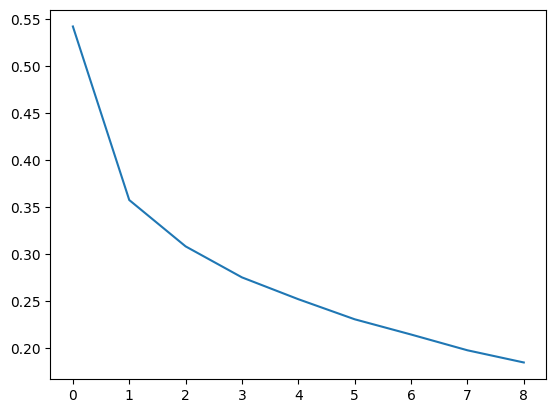

In [12]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'])

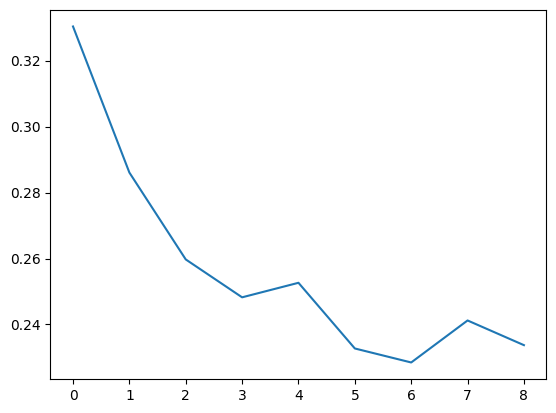

In [13]:
plt.plot(result.history['val_loss'])

In [14]:
model.evaluate(val_scaled, val_target)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9172 - loss: 0.2326


[0.23373396694660187, 0.9179333448410034]

In [15]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_input, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8837 - loss: 38.2062


[36.019474029541016, 0.8859000205993652]